In [1]:
from pandas import DataFrame, Series
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_main = pd.read_csv('home-credit-default-risk/application_train.csv', na_values=['','XNA','XAP'])

In [3]:
train_main = train_main[train_main['NAME_FAMILY_STATUS'] != 'Unknown'] #2 records with unknown family status
train_main = train_main[train_main['NAME_INCOME_TYPE'] != 'Businessman'] #10 businessman

In [4]:
credit_card = pd.read_csv('cleaned_tables/credit_card_summary.csv')
POS = pd.read_csv('cleaned_tables/df_POS_final2.csv')
install = pd.read_csv('cleaned_tables/df_pay_final2.csv')
bureau = pd.read_csv('cleaned_tables/Bureau_features.csv')
prev = pd.read_csv('cleaned_tables/prevapp_finally_train.csv')

In [5]:
cred_col = credit_card.columns
credit_col = cred_col[1:]
len(credit_col)
POS.drop(['DPD_df_POS','count_df_POS'], axis = 1, inplace = True)
POS_col = POS.columns[1:]
len(POS_col) #4 extra
install_col = install.columns[1:]
len(install_col) #12 extra
bureau_col = bureau.columns[1:]
len(bureau_col) #15 extra
prev_col = prev.columns[1:]
len(prev_col) # 10 extra

10

In [6]:
df = train_main.merge(credit_card, how = 'left', on = 'SK_ID_CURR')
df = df.merge(POS, how = 'left', left_on ='SK_ID_CURR', right_on = 'SK_ID_CURR_df_POS').drop('SK_ID_CURR_df_POS', axis = 1)
df = df.merge(install, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR_pay').drop('SK_ID_CURR_pay', axis = 1)
df = df.merge(bureau, how = 'left', on = 'SK_ID_CURR')
df = df.merge(prev, how = 'left', left_on = 'SK_ID_CURR', right_on = 'ID_CURR').drop('ID_CURR',axis = 1)

In [7]:
addl_col = cred_col.append([POS_col, install_col, bureau_col, prev_col]) # append other tables' columns as well
df[addl_col] = df[addl_col].fillna(0)
df[:5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_APPLICATION,NUM_APPLICATIONS,AMT_APPROVED,PCT_APPROVED,MIN_DAYS_DECISION,PCT_APPL_ON_SAME_DAY,min_term,max_term,mean_term,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,179055.00,1.0,179055.0,1.000000,-606.0,0.0,24.0,24.0,24.0,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1306309.50,3.0,1452573.0,1.000000,-746.0,0.0,6.0,12.0,9.0,-527.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,24282.00,1.0,20106.0,1.000000,-815.0,0.0,4.0,4.0,4.0,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2449829.34,9.0,1718644.5,0.555556,-181.0,0.0,0.0,48.0,18.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,903181.50,6.0,999832.5,1.000000,-374.0,0.0,18.0,48.0,30.0,0.0


In [8]:
X = df[df.columns[2:]]
print(X.shape)
X[:2]

(307499, 168)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_APPLICATION,NUM_APPLICATIONS,AMT_APPROVED,PCT_APPROVED,MIN_DAYS_DECISION,PCT_APPL_ON_SAME_DAY,min_term,max_term,mean_term,DAYS_TERMINATION
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,179055.0,1.0,179055.0,1.0,-606.0,0.0,24.0,24.0,24.0,-17.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1306309.5,3.0,1452573.0,1.0,-746.0,0.0,6.0,12.0,9.0,-527.0


In [9]:
y = df['TARGET']
print(y.shape)

(307499,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
print(len(y_train[y_train == 0])/len(y_train),len(y_test[y_test == 0])/len(y_test))

245999 61500 245999 61500
0.9190728417595193 0.9200487804878049


In [12]:
X_train_nona = X_train.drop(['APARTMENTS_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'COMMONAREA_AVG',
'COMMONAREA_MODE',
'ELEVATORS_AVG',
'ELEVATORS_MODE',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'FLOORSMIN_AVG',
'FLOORSMIN_MODE',
'LANDAREA_AVG',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_AVG',
'NONLIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_AVG',
'YEARS_BUILD_MODE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1)

X_test_nona = X_test.drop(['APARTMENTS_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'COMMONAREA_AVG',
'COMMONAREA_MODE',
'ELEVATORS_AVG',
'ELEVATORS_MODE',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'FLOORSMIN_AVG',
'FLOORSMIN_MODE',
'LANDAREA_AVG',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_AVG',
'NONLIVINGAREA_MODE',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_AVG',
'YEARS_BUILD_MODE',
'DEF_60_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE'], axis = 1)

In [13]:
columns_with_median = ['COMMONAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'BASEMENTAREA_MEDI',
'ELEVATORS_MEDI',
'APARTMENTS_MEDI',
'ENTRANCES_MEDI',
'LIVINGAREA_MEDI',
'FLOORSMAX_MEDI',
'AMT_GOODS_PRICE',
'AMT_ANNUITY']

for col in columns_with_median:
    X_train_nona[col].fillna(X_train_nona[col].median(), inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].median(), inplace = True)

In [14]:
columns_with_means = ['YEARS_BUILD_MEDI',
'EXT_SOURCE_1',
'TOTALAREA_MODE',
'EXT_SOURCE_3',
'EXT_SOURCE_2']

for col in columns_with_means:
    X_train_nona[col].fillna(X_train_nona[col].mean(), inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].mean(), inplace = True)

In [15]:
# Fill with Mode
columns_with_modes = ['FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'EMERGENCYSTATE_MODE']

for col in columns_with_modes:
    X_train_nona[col].fillna(X_train_nona[col].mode()[0], inplace = True)
    X_test_nona[col].fillna(X_train_nona[col].mode()[0], inplace = True)

In [16]:
columns_with_0s = ['NONLIVINGAPARTMENTS_MEDI',
'OWN_CAR_AGE',
'NONLIVINGAREA_MEDI',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_MON',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'CNT_FAM_MEMBERS',
'DAYS_LAST_PHONE_CHANGE']

for col in columns_with_0s:
    X_train_nona[col].fillna(0, inplace = True)
    X_test_nona[col].fillna(0, inplace = True)

In [17]:
X_train_nona['WALLSMATERIAL_MODE'].fillna("Others",inplace = True)
X_train_nona['OCCUPATION_TYPE'].fillna("Unemployed",inplace = True)
X_train_nona['ORGANIZATION_TYPE'].fillna("Retired",inplace = True)
X_train_nona['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace = True)
X_train_nona['CODE_GENDER'].fillna("F",inplace = True)

X_test_nona['WALLSMATERIAL_MODE'].fillna("Others",inplace = True)
X_test_nona['OCCUPATION_TYPE'].fillna("Unemployed",inplace = True)
X_test_nona['ORGANIZATION_TYPE'].fillna("Retired",inplace = True)
X_test_nona['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace = True)
X_test_nona['CODE_GENDER'].fillna("F",inplace = True)

In [18]:
string_categorical = X_train_nona.columns[X_train_nona.dtypes == 'object']
s1 = df[string_categorical].nunique()

In [19]:
# string binary
binary_cat = s1[s1 ==2].index 
binary_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [20]:
s2 = X_train_nona.loc[:,df.dtypes != 'object'].nunique()

In [21]:
binary_cat = binary_cat.append(s2[s2==2].index[1:]) #numerical binary; exclude target

In [22]:
binary_cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'EMERGENCYSTATE_MODE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [23]:
non_bi_cat = s1[s1>2].index # string
non_bi_cat = non_bi_cat.append(s2[(s2>2) & (s2<5)].index) # numerical
non_bi_cat # all

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY'],
      dtype='object')

In [24]:
for column in binary_cat:
    X_train_nona[column] = X_train_nona[column].astype('category').cat.codes
    X_test_nona[column] = X_test_nona[column].astype('category').cat.codes

In [25]:
X_train_nona[binary_cat].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
FLAG_EMP_PHONE                 2
FLAG_WORK_PHONE                2
FLAG_CONT_MOBILE               2
FLAG_PHONE                     2
FLAG_EMAIL                     2
REG_REGION_NOT_LIVE_REGION     2
REG_REGION_NOT_WORK_REGION     2
LIVE_REGION_NOT_WORK_REGION    2
REG_CITY_NOT_LIVE_CITY         2
REG_CITY_NOT_WORK_CITY         2
LIVE_CITY_NOT_WORK_CITY        2
FLAG_DOCUMENT_2                2
FLAG_DOCUMENT_3                2
FLAG_DOCUMENT_4                2
FLAG_DOCUMENT_5                2
FLAG_DOCUMENT_6                2
FLAG_DOCUMENT_7                2
FLAG_DOCUMENT_8                2
FLAG_DOCUMENT_9                2
FLAG_DOCUMENT_10               2
FLAG_DOCUMENT_11               2
FLAG_DOCUMENT_12               2
FLAG_DOCUMENT_13               2
FLAG_DOCUMENT_14               2
FLAG_DOCUMENT_15               2
FLAG_DOCUM

In [26]:
X_train_nona = pd.get_dummies(X_train_nona,
                            prefix=non_bi_cat,
                            columns=non_bi_cat)
X_train_nona.shape #up from 138

(245999, 258)

In [27]:
X_test_nona = pd.get_dummies(X_test_nona,
                            prefix=non_bi_cat,
                            columns=non_bi_cat)
X_test_nona.shape #same with training

(61500, 258)

In [28]:
X_train_nona.columns.symmetric_difference(X_test_nona.columns)

Index([], dtype='object')

In [29]:
#Turning all categorical columns into object type
#for column in X_train_nona.columns:
#    if(len(X_train_nona[column].value_counts())<=2):
#        X_train_nona[column] = X_train_nona[column].astype('object')

#return column index of categorical columns
#cat_col_index = []
#for column in X_train_nona.columns:
#if(X_train_nona[column].dtype == 'object'):
#        cat_col_index.append(X_train_nona.columns.get_loc(column))

#from imblearn.over_sampling import SMOTENC
#smt = SMOTENC(categorical_features=cat_col_index,random_state = 11)
#X_train_nona1, y_train = smt.fit_sample(X_train_nona, y_train)

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_estimators = 200) # up from 100 
clf.fit(X_train_nona,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import metrics

y_pred = clf.predict(X_train_nona)
y_pred_test = clf.predict(X_test_nona)
y_score_test = clf.predict_proba(X_test_nona)[:,1]
print("training accuracy:", round(metrics.accuracy_score(y_train,y_pred),4), "\n"
     "test accuracy:", round(metrics.accuracy_score(y_test,y_pred_test),4), "\n"
    "ROC_AUC_score:", round(roc_auc_score(y_test,y_score_test),4), "\n"
     "F1 score:", f1_score(y_test, y_pred_test))

training accuracy: 1.0 
test accuracy: 0.9201 
ROC_AUC_score: 0.7373 
F1 score: 0.0020316944331572532


In [32]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train_nona.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:10]

,importance
EXT_SOURCE_2,0.038505
EXT_SOURCE_3,0.034130
DAYS_BIRTH,0.022383
DAYS_ID_PUBLISH,0.021227
DAYS_REGISTRATION,0.020903
AMT_PAYMENT_pay,0.019339
AMT_INSTALMENT_pay,0.019244
AMT_ANNUITY,0.019209
DPD_avg_pay,0.019072
DAYS_EMPLOYED,0.018914


In [33]:
#feature_importances[:15].plot(kind='Bar')

In [34]:
top10_features = list(feature_importances.reset_index()['index'][:20])

In [35]:
top10_features

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'AMT_PAYMENT_pay',
 'AMT_INSTALMENT_pay',
 'AMT_ANNUITY',
 'DPD_avg_pay',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'EXT_SOURCE_1',
 'AMT_CREDIT',
 'DPD_min_pay',
 'AMT_APPLICATION',
 'MIN_DAYS_DECISION',
 'AMT_APPROVED',
 'NUM_INSTALMENT_NUMBER_pay',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL']

In [36]:
x_top10_train1 = X_train_nona[top10_features]
x_top10_test = X_test_nona[top10_features]

In [37]:
x_top10_train1.sort_index()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,AMT_PAYMENT_pay,AMT_INSTALMENT_pay,AMT_ANNUITY,DPD_avg_pay,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_1,AMT_CREDIT,DPD_min_pay,AMT_APPLICATION,MIN_DAYS_DECISION,AMT_APPROVED,NUM_INSTALMENT_NUMBER_pay,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL
0,0.262949,0.139376,-9461,-2120,-3648.0,219625.695,219625.695,24700.5,-20.421053,-637,-1134.0,0.083037,406597.5,-31.0,179055.00,-606.0,179055.0,19.0,0.018801,202500.0
2,0.555912,0.729567,-19046,-2531,-4260.0,21288.465,21288.465,6750.0,-7.666667,-225,-815.0,0.502126,135000.0,-11.0,24282.00,-815.0,20106.0,3.0,0.010032,67500.0
3,0.650442,0.510880,-19005,-2437,-9833.0,1007153.415,1007153.415,29686.5,-19.375000,-3039,-617.0,0.502126,312682.5,-77.0,2449829.34,-181.0,1718644.5,16.0,0.008019,135000.0
5,0.354225,0.621226,-16941,-477,-4970.0,957617.595,969603.750,27517.5,26.114286,-1588,-2536.0,0.502126,490495.5,-28.0,778509.00,-82.0,813838.5,35.0,0.035792,99000.0
7,0.714279,0.540654,-18850,-2379,-4597.0,274492.080,274492.080,42075.0,-11.900000,-449,-1070.0,0.502126,1530000.0,-30.0,0.00,0.0,0.0,10.0,0.003122,360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307494,0.681632,0.510880,-9327,-1982,-8456.0,52450.470,52450.470,27558.0,-36.285714,-236,-273.0,0.145570,254700.0,-46.0,40455.00,-273.0,40455.0,7.0,0.032561,157500.0
307495,0.115992,0.510880,-20775,-4090,-4388.0,60419.205,60419.205,12001.5,-2.833333,365243,0.0,0.502126,269550.0,-11.0,57595.50,-2497.0,56821.5,6.0,0.025164,72000.0
307496,0.535722,0.218859,-14966,-5150,-6737.0,57622.815,61595.910,29979.0,-14.500000,-7921,-1909.0,0.744026,677664.0,-51.0,48325.50,-1909.0,41251.5,14.0,0.005002,153000.0
307497,0.514163,0.661024,-11961,-931,-2562.0,194556.825,194556.825,20205.0,-19.000000,-4786,-322.0,0.502126,370107.0,-31.0,242635.50,-277.0,268879.5,19.0,0.005313,171000.0


In [38]:
x_top10_train1.index = x_top10_train1.index.astype(int)
y_train.index = y_train.index.astype(int)

In [39]:
#Turning all categorical columns into object type
for column in x_top10_train1.columns:
    if(len(x_top10_train1[column].value_counts())<=2):
        x_top10_train1[column] = x_top10_train1[column].astype('object')

cat_col_index = []
for column in x_top10_train1.columns:
    if(x_top10_train1[column].dtype == 'object'):
        cat_col_index.append(x_top10_train1.columns.get_loc(column))
cat_col_index

[]

In [40]:
       
from imblearn.over_sampling import SMOTENC,SMOTE
#smt = SMOTENC(categorical_features=cat_col_index,random_state = 11)
smt = SMOTE(random_state=11)
x_top10_train, y_train = smt.fit_sample(x_top10_train1, y_train)

Using TensorFlow backend.


In [41]:
x_top10_train = pd.DataFrame(x_top10_train, columns=x_top10_train1.columns)

In [42]:
y_train = pd.Series(y_train)

In [43]:
y_test

214680    0
288472    1
26682     0
71216     0
110513    0
         ..
127131    0
91105     0
18691     0
84309     0
153888    0
Name: TARGET, Length: 61500, dtype: int64

In [44]:
x_top10_train.to_csv('x20_train.csv')
x_top10_test.to_csv('x20_test.csv')
y_train.to_csv('y20_train.csv')
y_test.to_csv('y20_test.csv')

C:\Users\micha\Anaconda3\envs\aix360\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\micha\Anaconda3\envs\aix360\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [45]:
clf.fit(x_top10_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
y_pred_top10 = clf.predict(x_top10_train)
y_pred_test10 = clf.predict(x_top10_test)
y_score_test10 = clf.predict_proba(x_top10_test)[:,1]
print("training accuracy:", round(metrics.accuracy_score(y_train,y_pred_top10),4), "\n"
     "test accuracy:", round(metrics.accuracy_score(y_test,y_pred_test10),4), "\n"
    "ROC_AUC_score:", round(roc_auc_score(y_test,y_score_test10),4), "\n"
     "F1 score:", f1_score(y_test, y_pred_test10))

training accuracy: 1.0 
test accuracy: 0.8523 
ROC_AUC_score: 0.6827 
F1 score: 0.1888174347981422


In [47]:
#feature_importances2 = pd.DataFrame(clf.feature_importances_, index = x_top10_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [48]:
#feature_importances2

# LRCG

In [49]:
from aix360.algorithms.rbm import FeatureBinarizer

fb = FeatureBinarizer(negations=True) # can't really find source code...
X_train_fb = fb.fit_transform(x_top10_train)
X_test_fb = fb.transform(x_top10_test)

In [50]:
from aix360.algorithms.rbm import GLRMExplainer, LogisticRuleRegression
logistic_model = LogisticRuleRegression(maxSolverIter = 2000)
explainer = GLRMExplainer(logistic_model)
explainer.fit(X_train_fb, y_train)

In [51]:
Y_pred = explainer.predict(X_test_fb)
Y_score = explainer.predict_proba(X_test_fb)

from sklearn.metrics import roc_auc_score, f1_score, r2_score, explained_variance_score, mean_absolute_error, max_error
print("AUROC score:", roc_auc_score(y_test, Y_score), "\n" # it's ok
      "F1 score:", f1_score(y_test, Y_pred), "\n"
      "R2 score:", r2_score(y_test, Y_pred), "\n" # seems to be pretty bad - can't explain anything
      "Explained Variance:", explained_variance_score(y_test, Y_pred), "\n" # again, bad
      "MAE:", mean_absolute_error(y_test, Y_pred), "\n"
      "Max error:", max_error(y_test, Y_pred)
     )

AUROC score: 0.6678057601258027 
F1 score: 0.21295155020384943 
R2 score: -4.50478810348169 
Explained Variance: -2.7955377866508013 
MAE: 0.4049268292682927 
Max error: 1


In [52]:
explainer.explain()

,rule,coefficient
0,(intercept),-1.58181
1,EXT_SOURCE_2 <= 0.65 AND EXT_SOURCE_3 <= 0.61,1.18096
2,EXT_SOURCE_3 <= 0.51,1.11587
3,EXT_SOURCE_2 <= 0.55,1.03884
4,EXT_SOURCE_2 <= 0.65 AND EXT_SOURCE_3 <= 0.51,0.0790509


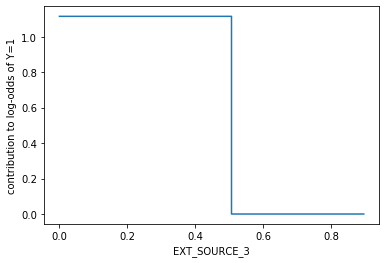

In [55]:
logistic_model.visualize(df, fb, ['EXT_SOURCE_3']);

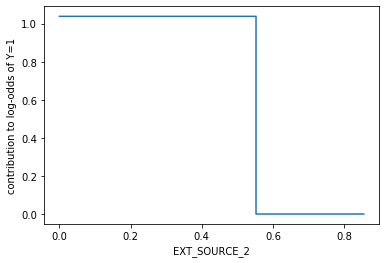

In [56]:
logistic_model.visualize(df, fb, ['EXT_SOURCE_2']);

# BRCG

In [82]:
from aix360.algorithms.rbm import BRCGExplainer, BooleanRuleCG

In [83]:
boolean_model = BooleanRuleCG()
explainer = BRCGExplainer(boolean_model)
explainer.fit(X_train_fb, y_train)

Learning DNF rule with complexity parameters lambda0=0.001, lambda1=0.001
Initial LP solved
Iteration: 1, Objective: 0.3478
Iteration: 2, Objective: 0.3254
Iteration: 3, Objective: 0.3170
Iteration: 4, Objective: 0.3128
Iteration: 5, Objective: 0.3075
Iteration: 6, Objective: 0.3075
Iteration: 7, Objective: 0.3075
Iteration: 8, Objective: 0.3075
Iteration: 9, Objective: 0.3075


In [84]:
Y_pred = explainer.predict(X_test_fb)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'Accuracy = {accuracy_score(y_test, Y_pred)}')
print(f'Precision = {precision_score(y_test, Y_pred)}')
print(f'Recall = {recall_score(y_test, Y_pred)}')
print(f'F1 = {f1_score(y_test, Y_pred)}')

Accuracy = 0.5997073170731707
Precision = 0.1224849576514774
Recall = 0.6499898311978849
F1 = 0.20612705578845536


In [86]:
e = explainer.explain()
isCNF = 'Predict Y=0 if ANY of the following rules are satisfied, otherwise Y=1:'
notCNF = 'Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:'
print(isCNF if e['isCNF'] else notCNF)
print()
for rule in e['rules']:
    print(f'  - {rule}')

Predict Y=1 if ANY of the following rules are satisfied, otherwise Y=0:

  - EXT_SOURCE_2 <= 0.55 AND EXT_SOURCE_3 <= 0.51
  - EXT_SOURCE_2 <= 0.65 AND EXT_SOURCE_3 <= 0.61 AND EXT_SOURCE_3 > 0.51
